In [326]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/mnt/project')
from constants import PROCESSED_DATASET
import seaborn as sns
import matplotlib 
matplotlib.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
from preprocess.read_obs import get_obs
from load_dataset import load_dataset
from preprocess.read_raster import get_raster_colnames, get_raster_names

In [561]:
def open_datasets(taxon_id):
    from preprocess.absence_generation import get_dataset_by_species
    from preprocess.absence_generation import get_coordinates_of_species

    ## import presence dataset # lat long
    species_presence = get_dataset_by_species(taxon_id)
    species_presence.reset_index(drop=True, inplace=True)

    ## import absence dataset # Long Lat
    from constants import PROCESSED_DATASET
    species_absence = pd.read_csv(PROCESSED_DATASET / 'absence_{}.csv'.format(taxon_id))
    failed_absence = pd.read_csv(PROCESSED_DATASET / 'failed_absence_{}.csv'.format(taxon_id)) 
    
    ## get the vicgrid coordinates
    presence_coords_in_vicgrid = pd.DataFrame(get_coordinates_of_species(taxon_id), columns = ['longitudedd_num','latitudedd_num'])
    
    ## swap to make species presence follow long then lat setup the same as the absence data
    ## switch to vicgrid coordinates as well

    species_presence['latitudedd_num'] = presence_coords_in_vicgrid['latitudedd_num']
    species_presence['longitudedd_num'] = presence_coords_in_vicgrid['longitudedd_num']
    
    return species_presence, species_absence
    
species_presence, species_absence = open_datasets(11028)

In [562]:
## get the vicgrid coordinates
# presence_coords_in_vicgrid = pd.DataFrame(get_coordinates_of_species(13182), columns = ['longitudedd_num','latitudedd_num'])
# above line does not work in my package manager

In [563]:
## swap to make species presence follow long then lat setup the same as the absence data
## switch to vicgrid coordinates as well

# species_presence['latitudedd_num'] = presence_coords_in_vicgrid['longitudedd_num']
# species_presence['longitudedd_num'] = presence_coords_in_vicgrid['latitudedd_num']

In [564]:
print(species_presence.shape)
print(species_absence.shape)
species_presence['latitudedd_num'].isna().sum()

(6573, 54)
(6573, 40)


0

In [565]:
species_presence.iloc[23]

ufi                                                                         4026332
taxon_id                                                                      11028
reliability                                                              Acceptable
rating_int                                                                        0
reliability_txt                                                                 NaN
sampling_method_desc                                                   Elliott trap
survey_start_date                                                       14/JUL/1996
latitudedd_num                                                          2.45543e+06
longitudedd_num                                                         2.42699e+06
lat_long_accuracydd_int                                                         100
total_count_int                                                                   1
record_type                                                   Captured and r

In [566]:
def make_sizes(species_presence, species_absence):
    ### We will now seek to make the two dataframes into the same size so that we can compare them in modelling.
    ## cleaning the presence data -- removing unwanted columne
    absence_df = pd.DataFrame(columns=species_presence.columns) # create empty absence dataframe to populate with values


    # delete useless columns from both dataframe
    cols_to_drop = ['taxon_id', 'ufi', 'rating_int', 'survey_start_date', 'lat_long_accuracydd_int', 'park_id','survey_id','creation_tsp', 'reliability_txt']
    species_presence = species_presence.drop(cols_to_drop, 1)
    absence_df = absence_df.drop(cols_to_drop, 1)
    
    ## We are populating the absence_df with the values from species_absence. We still have NaN's where we have not populated it with anything yet
    absence_df[species_absence.columns] = species_absence[species_absence.columns]
    
    return species_presence, absence_df

species_presence, absence_df = make_sizes(species_presence, species_absence)

In [567]:
## We are populating the absence_df with the values from species_absence. We still have NaN's where we have not populated it with anything yet
# absence_df[species_absence.columns] = species_absence[species_absence.columns]
# absence_df.head()

In [568]:
absence_df.head()

reliability sampling_method_desc  latitudedd_num  longitudedd_num  \
0         NaN                  NaN    2.350810e+06     2.835326e+06   
1         NaN                  NaN    2.785450e+06     2.230699e+06   
2         NaN                  NaN    2.600148e+06     2.429146e+06   
3         NaN                  NaN    2.707983e+06     2.775400e+06   
4         NaN                  NaN    2.322840e+06     1.999284e+06   

  total_count_int record_type sv_record_count  ProtectionIndex_0  \
0             NaN         NaN             NaN             0.0000   
1             NaN         NaN             NaN             0.0101   
2             NaN         NaN             NaN             0.0052   
3             NaN         NaN             NaN             0.0087   
4             NaN         NaN             NaN             0.0000   

   75m_dem_streams_burned_sept2012_0  vegtype3_4_0  ibra_hex_0  \
0                          -1.000000           -99         141   
1                          46.200001             4          37   
2                          92.800003           109          68   
3                         211.600006           103          51   
4                          -1.000000           -99         141   

   sept2014JulRainfall_0  sept2014JanRainfall_0  SummerLandsat75_300_900m_0  \
0              56.234402                31.2344                  777.062378   
1              -7.662800               -14.6628                 2897.211182   
2              -2.843500               -14.8435                 2289.099609   
3              28.092400                13.0924                 2705.515137   
4             113.234398                -6.2159                 1022.167664   

   SummerLandsat75_300_900m_1  SummerLandsat75_300_900m_2  \
0                  568.067627                    1.014833   
1                 3951.093262                    1.124199   
2                 3425.376709                    1.131932   
3                 3295.027100                    1.196181   
4                  793.616089                    1.016038   

   SummerLandsat75_300_900m_3  SummerLandsat75_300_900m_4  \
0                    0.949494                    1.014833   
1                    1.104566                    1.127348   
2                    1.161118                    1.136500   
3                    1.189498                    1.214864   
4                    0.934973                    1.014079   

   SummerLandsat75_300_900m_5  SummerLandsat75_300_900m_6  \
0                    0.949494                    1.014595   
1                    1.120613                    1.128412   
2                    1.162904                    1.142272   
3                    1.178906                    1.204223   
4                    0.933299                    1.013313   

   SummerLandsat75_300_900m_7  \
0                    0.949227   
1                    1.131852   
2                    1.166407   
3                    1.176138   
4                    0.932568   

   log_vertical_distance_saline_wetlands_sept2012_0  ecoregion2014_0  \
0                                            0.0000              161   
1                                            0.8127                8   
2                                            1.1891               14   
3                                            2.2736               18   
4                                            0.0000              165   

   Radiometrics_2014_k_0  Anisotrophic_Heating_Ruggedness_0  hydro500xwi_0  \
0               0.000000                             0.0000       7.300000   
1               0.699875                             0.0000       0.061034   
2               1.184166                            -0.0018       0.613038   
3               1.639359                             0.0071       3.348283   
4               0.000000                             0.0000       7.300000   

   Radiometrics_2014_th_0  sept2014JulMinTemp_0  land_cov_use3_0  \
0                1.76559

In [582]:
def encode_catagorical(dataframe, col_name):
    # let us first remove all NaN values
    dataframe = dataframe.fillna('0')
    
    from sklearn.preprocessing import OrdinalEncoder
    enc = OrdinalEncoder()
    X = list(dataframe[str(col_name)].apply(lambda x: [x]))
    enc.fit(X)
    enc.categories_
    display(enc.categories_)
    dataframe[str(col_name)] = dataframe[str(col_name)].apply(lambda x: enc.transform([[x]])[0][0])
    return dataframe

def drop_null_cols(dataframe, absence_dataframe):
    """
    Removes any columns which have null in their entirety
    Returns the updated dataframes and a list of columns which have been dropped
    """
    cols = list(dataframe.columns)
    dropped_columns = []
    for column in cols:
        if dataframe[str(column)].isnull().sum() == len(dataframe):
            dataframe.drop(str(column), axis=1, inplace=True)
            absence_dataframe.drop(str(column), axis=1, inplace=True)
            dropped_columns.append(column)
    return dataframe, absence_dataframe, dropped_columns

def drop_rows_with_na(dataframe, column):
    dataframe.dropna(subset=[column], inplace=True)
    return dataframe

def generate_column_distribution(dataframe, column):
    """
    Function which returns an a distribution of the least occuring items in the given column of the given dataframe
    """
    distribution = dataframe[str(column)].value_counts()
    rows = list(distribution.index)
    prob = distribution.apply(lambda x : 1 - x/len(dataframe))
    prob_sum = sum(prob)
    inverse_prob = prob.apply(lambda x : x/prob_sum)
    return rows, inverse_prob

def generate_column_distribution_alt(dataframe, column):
    distribution = dataframe[str(column)].value_counts()
#     display(distribution)
    rows = list(distribution.index)
#     display(rows)
    prob = distribution.apply(lambda x : x/len(dataframe))
#     display(prob)
#     display(sum(prob))
    return rows, prob


def get_nan_rows(dataframe, column):
    """
    Returns a dataset containing all of the rows for which the reliability column contains a NaN
    """
    nan_sampling_method = dataframe[dataframe['reliability'].isna()][[column]]
    nan_sampling_method.fillna('Other', inplace=True)
    return nan_sampling_method

def generate_absence_columns(absence_dataframe, presence_dataframe):
    cols = list(presence_dataframe.columns)
    for column in cols:
        if column == 'reliability':
            absence_dataframe[column] = absence_dataframe[column].apply(lambda x: 'Unacceptable')
            
        elif column == 'sampling_method_desc':
            nan_df = get_nan_rows(presence_dataframe, column)
            presence_dataframe[column].fillna('Other', inplace=True)
            rows, inv_prob = generate_column_distribution_alt(presence_dataframe,column)
            absence_dataframe[column] = absence_dataframe[column].apply(lambda x: np.random.choice(rows, 1, p=inv_prob)[0])
        
        elif column == 'record_type':
            nan_df = get_nan_rows(presence_dataframe, column)
            presence_dataframe[column].fillna('Other', inplace=True)
            rows, inv_prob = generate_column_distribution_alt(presence_dataframe,column)
            absence_dataframe[column] = absence_dataframe[column].apply(lambda x: np.random.choice(rows, 1, p=inv_prob)[0])
            
        elif column == 'sv_record_count':   # this can be tweaked, at the moment, the idea is that we want to keep the numbers small, if somebody saw several hundred, then it's probably right
            absence_dataframe[column] = absence_dataframe[column].apply(lambda x: np.random.choice([1,2,3,4,5], 1, p=[0.4, 0.2, 0.2, 0.1, 0.1])[0]) # will pick a number 1-5 biased towards 1
        
        elif column == 'total_count_int':
            presence_dataframe[column].fillna(0, inplace=True)
            rows, inv_prob = generate_column_distribution_alt(presence_dataframe,column)
            absence_dataframe[column] = absence_dataframe[column].apply(lambda x: np.random.choice(rows, 1, p=inv_prob)[0])

    return absence_dataframe, presence_dataframe

def generate_presence_column(presence_dataframe):
    cols = list(presence_dataframe.columns)
    for column in cols:
        if column == 'reliability':
            presence_dataframe[column] = presence_dataframe[column].apply(lambda x: 'Unacceptable' if x == "Unconfirmed" else x)
            presence_dataframe[column] = presence_dataframe[column].notna().apply(lambda x: 'Acceptable')
    return presence_dataframe



            

In [584]:
## Remove cols with nulls in the column, can happen for specific species
species_presence,absence_df, columns = drop_null_cols(species_presence, absence_df)

## Generate the absence columns according the information in the presence dataset
absence_df, species_presence = generate_absence_columns(absence_df, species_presence)

## Change the species dataframe reliability column to binary options.
species_presence = generate_presence_column(species_presence)
def merge_dataset(species_presence, absence_df):
    ## We can now merge the two dataframe's together
    merged_dataset = pd.concat([species_presence, absence_df])

    ## randomise the dataframe
    merged_dataset = merged_dataset.sample(frac=1)

    ## drop any rows with na values
    merged_dataset = drop_rows_with_na(merged_dataset, 'reliability')
    
    ## get dummies for the sampling method, ie make them into one-hot encoding
    final_dataset = pd.get_dummies(merged_dataset, prefix=['sampling_method_desc', 'record_type'], columns=['sampling_method_desc', 'record_type'])
    ## binarise the reliability column into numbers instead of strings
    final_dataset = encode_catagorical(final_dataset, 'reliability')

    ## drop any columns we do not need, in this case, sv_record_count has unclear purpose, so will not use
    final_dataset.drop(['sv_record_count'], 1, inplace=True) 
    
    return final_dataset

final_dataset = merge_dataset(species_presence, absence_df)

reliability  latitudedd_num  longitudedd_num  total_count_int  \
4484    Acceptable    2.430798e+06     2.568231e+06              0.0   
6411  Unacceptable    2.516606e+06     2.880566e+06              3.0   
848   Unacceptable    2.372241e+06     2.571197e+06              1.0   
5156    Acceptable    2.443658e+06     2.425638e+06              2.0   
6387    Acceptable    2.381369e+06     2.558250e+06              0.0   

      sv_record_count  ProtectionIndex_0  75m_dem_streams_burned_sept2012_0  \
4484                3             0.0495                        1229.400024   
6411                1             0.0442                         804.000000   
848                 4             0.0320                          81.400002   
5156                3             0.0311                         621.200012   
6387                1             0.0417                          95.199997   

      vegtype3_4_0  ibra_hex_0  sept2014JulRainfall_0  sept2014JanRainfall_0  \
4484            11         133             183.900208              58.741798   
6411             7          78              11.089900              32.085400   
848              6         118              49.181499              25.910500   
5156            12         114              66.012100              15.382400   
6387             6         124              51.314999              27.917601   

      SummerLandsat75_300_900m_0  SummerLandsat75_300_900m_1  \
4484                 2008.736694                  876.291504   
6411                 2157.990967                 2578.700684   
848                  2841.649658                 2109.380615   
5156                 2048.708984                  907.082520   
6387                 2538.669189                 1563.957153   

      SummerLandsat75_300_900m_2  SummerLandsat75_300_900m_3  \
4484                    1.336563                    1.122597   
6411                    1.220866                    1.210401   
848                     1.388547                    1.214522   
5156                    1.339875                    1.128174   
6387                    1.389258                    1.176733   

      SummerLandsat75_300_900m_4  SummerLandsat75_300_900m_5  \
4484                    1.344168                    1.122748   
6411                    1.224787                    1.209379   
848                     1.385270                    1.206102   
5156                    1.337152                    1.140128   
6387                    1.380527                    1.177102   

      SummerLandsat75_300_900m_6  SummerLandsat75_300_900m_7  \
4484                    1.349262                    1.124811   
6411                    1.232473                    1.215866   
848                     1.373790                    1.203151   
5156                    1.337327                    1.152178   
6387                    1.354836                    1.174967   

      log_vertical_distance_saline_wetlands_sept2012_0  ecoregion2014_0  \
4484                                            3.0826              125   
6411                                            2.9037               69   
848                                             1.8824               98   
5156                                            2.7239              100   
6387                                            1.9495               98   

      Radiometrics_2014_k_0  Anisotrophic_Heating_Ruggedness_0  hydro500xwi_0  \
4484               0.687880                             0.1782       0.021132   
6411               1.028455                            -0.0461       0.103579   
848                0.366666                            -0.1605       0.066154   
5156               0.634823                            -0.1101       0.013754   
6387               0.331522                            -0.2422       0.061922   

      Radiometrics_2014_th_0  sept2014JulMinTemp_0  land_cov_use3_0  \
4484                7.702347             30.500700               11  

[array(['Acceptable', 'Unacceptable'], dtype=object)]

reliability  latitudedd_num  longitudedd_num  total_count_int  \
4484          0.0    2.430798e+06     2.568231e+06              0.0   
6411          1.0    2.516606e+06     2.880566e+06              3.0   
848           1.0    2.372241e+06     2.571197e+06              1.0   
5156          0.0    2.443658e+06     2.425638e+06              2.0   
6387          0.0    2.381369e+06     2.558250e+06              0.0   

      sv_record_count  ProtectionIndex_0  75m_dem_streams_burned_sept2012_0  \
4484                3             0.0495                        1229.400024   
6411                1             0.0442                         804.000000   
848                 4             0.0320                          81.400002   
5156                3             0.0311                         621.200012   
6387                1             0.0417                          95.199997   

      vegtype3_4_0  ibra_hex_0  sept2014JulRainfall_0  sept2014JanRainfall_0  \
4484            11         133             183.900208              58.741798   
6411             7          78              11.089900              32.085400   
848              6         118              49.181499              25.910500   
5156            12         114              66.012100              15.382400   
6387             6         124              51.314999              27.917601   

      SummerLandsat75_300_900m_0  SummerLandsat75_300_900m_1  \
4484                 2008.736694                  876.291504   
6411                 2157.990967                 2578.700684   
848                  2841.649658                 2109.380615   
5156                 2048.708984                  907.082520   
6387                 2538.669189                 1563.957153   

      SummerLandsat75_300_900m_2  SummerLandsat75_300_900m_3  \
4484                    1.336563                    1.122597   
6411                    1.220866                    1.210401   
848                     1.388547                    1.214522   
5156                    1.339875                    1.128174   
6387                    1.389258                    1.176733   

      SummerLandsat75_300_900m_4  SummerLandsat75_300_900m_5  \
4484                    1.344168                    1.122748   
6411                    1.224787                    1.209379   
848                     1.385270                    1.206102   
5156                    1.337152                    1.140128   
6387                    1.380527                    1.177102   

      SummerLandsat75_300_900m_6  SummerLandsat75_300_900m_7  \
4484                    1.349262                    1.124811   
6411                    1.232473                    1.215866   
848                     1.373790                    1.203151   
5156                    1.337327                    1.152178   
6387                    1.354836                    1.174967   

      log_vertical_distance_saline_wetlands_sept2012_0  ecoregion2014_0  \
4484                                            3.0826              125   
6411                                            2.9037               69   
848                                             1.8824               98   
5156                                            2.7239              100   
6387                                            1.9495               98   

      Radiometrics_2014_k_0  Anisotrophic_Heating_Ruggedness_0  hydro500xwi_0  \
4484               0.687880                             0.1782       0.021132   
6411               1.028455                            -0.0461       0.103579   
848                0.366666                            -0.1605       0.066154   
5156               0.634823                            -0.1101       0.013754   
6387               0.331522                            -0.2422       0.061922   

      Radiometrics_2014_th_0  sept2014JulMinTemp_0  land_cov_use3_0  \
4484                7.702347             30.500700               11   
641

In [571]:
final_dataset

reliability  latitudedd_num  longitudedd_num  total_count_int  \
951           1.0    2.623352e+06     2.875940e+06              4.0   
372           0.0    2.325226e+06     2.384621e+06              2.0   
1089          1.0    2.861159e+06     2.771512e+06              0.0   
1867          0.0    2.342651e+06     2.495162e+06              0.0   
644           1.0    2.360376e+06     2.080470e+06              3.0   
398           0.0    2.339367e+06     2.421274e+06              6.0   
537           1.0    2.787040e+06     2.651383e+06              1.0   
2136          0.0    2.447348e+06     2.445614e+06              0.0   
1928          0.0    2.404246e+06     2.573086e+06              0.0   
5294          0.0    2.457011e+06     2.437122e+06              0.0   
790           1.0    2.730717e+06     2.040970e+06              1.0   
3570          0.0    2.314231e+06     2.639751e+06              2.0   
1933          1.0    2.579463e+06     2.052111e+06              2.0   
5740          0.0    2.473187e+06     2.850942e+06              0.0   
30            1.0    2.516776e+06     2.418398e+06              2.0   
4761          0.0    2.316436e+06     2.382698e+06              1.0   
729           1.0    2.477332e+06     2.586609e+06              0.0   
5697          1.0    2.902779e+06     2.385263e+06              1.0   
2418          0.0    2.470520e+06     2.417612e+06              1.0   
5543          1.0    2.543494e+06     2.971538e+06              1.0   
5061          0.0    2.346583e+06     2.420415e+06              0.0   
6471          1.0    2.321164e+06     2.877454e+06              0.0   
6233          0.0    2.464842e+06     2.421390e+06              1.0   
2187          1.0    2.374470e+06     2.881506e+06              1.0   
2646          0.0    2.424464e+06     2.833165e+06              1.0   
3387          1.0    2.841510e+06     2.321687e+06              5.0   
4597          1.0    2.671678e+06     2.123553e+06              1.0   
5872          1.0    2.382071e+06     2.237584e+06              1.0   
5547          1.0    2.366974e+06     2.459754e+06              1.0   
4045          1.0    2.291489e+06     2.731437e+06              0.0   
...           ...             ...              ...              ...   
432           1.0    2.396964e+06     2.501872e+06              0.0   
5699          1.0    2.617957e+06     2.118259e+06              1.0   
137           0.0    2.358884e+06     2.692967e+06              1.0   
4390          1.0    2.590359e+06     2.466646e+06              0.0   
6291          1.0    2.896257e+06     2.235170e+06              0.0   
2708          1.0    2.792778e+06     2.735547e+06              0.0   
1943          0.0    2.427187e+06     2.823167e+06              0.0   
590           0.0    2.410257e+06     2.535389e+06              1.0   
4891          1.0    2.631183e+06     2.428180e+06              1.0   
5958          0.0    2.436326e+06     2.870584e+06              0.0   
5797          1.0    2.429406e+06     2.163339e+06              6.0   
4207          1.0    2.818006e+06     2.067460e+06              1.0   
4824          0.0    2.443623e+06     2.460031e+06              2.0   
2896          1.0    2.784909e+06     2.010035e+06              0.0   
1613          0.0    2.449110e+06     2.835978e+06             28.0   
3186          1.0    2.666769e+06     2.190557e+06              1.0   
1391          1.0    2.527602e+06     2.945100e+06              0.0   
1329          1.0    2.947125e+06     2.758576e+06              0.0   
5357          1.0    2.606443e+06     2.502509e+06              1.0   
1300          1.0    2.839900e+06     2.899311e+06              1.0   
4707          0.0    2.433722e+06     2.889619e+06              0.0   
1725          0.0    2.444686e+06     2.858620e+06              1.0   
3076          1.0    2.651688e+06     2.707993e+06              1.0   
3394          1.0    2.830912e+06     2.409997e+06              1.0   
544           0.0    2.445953e

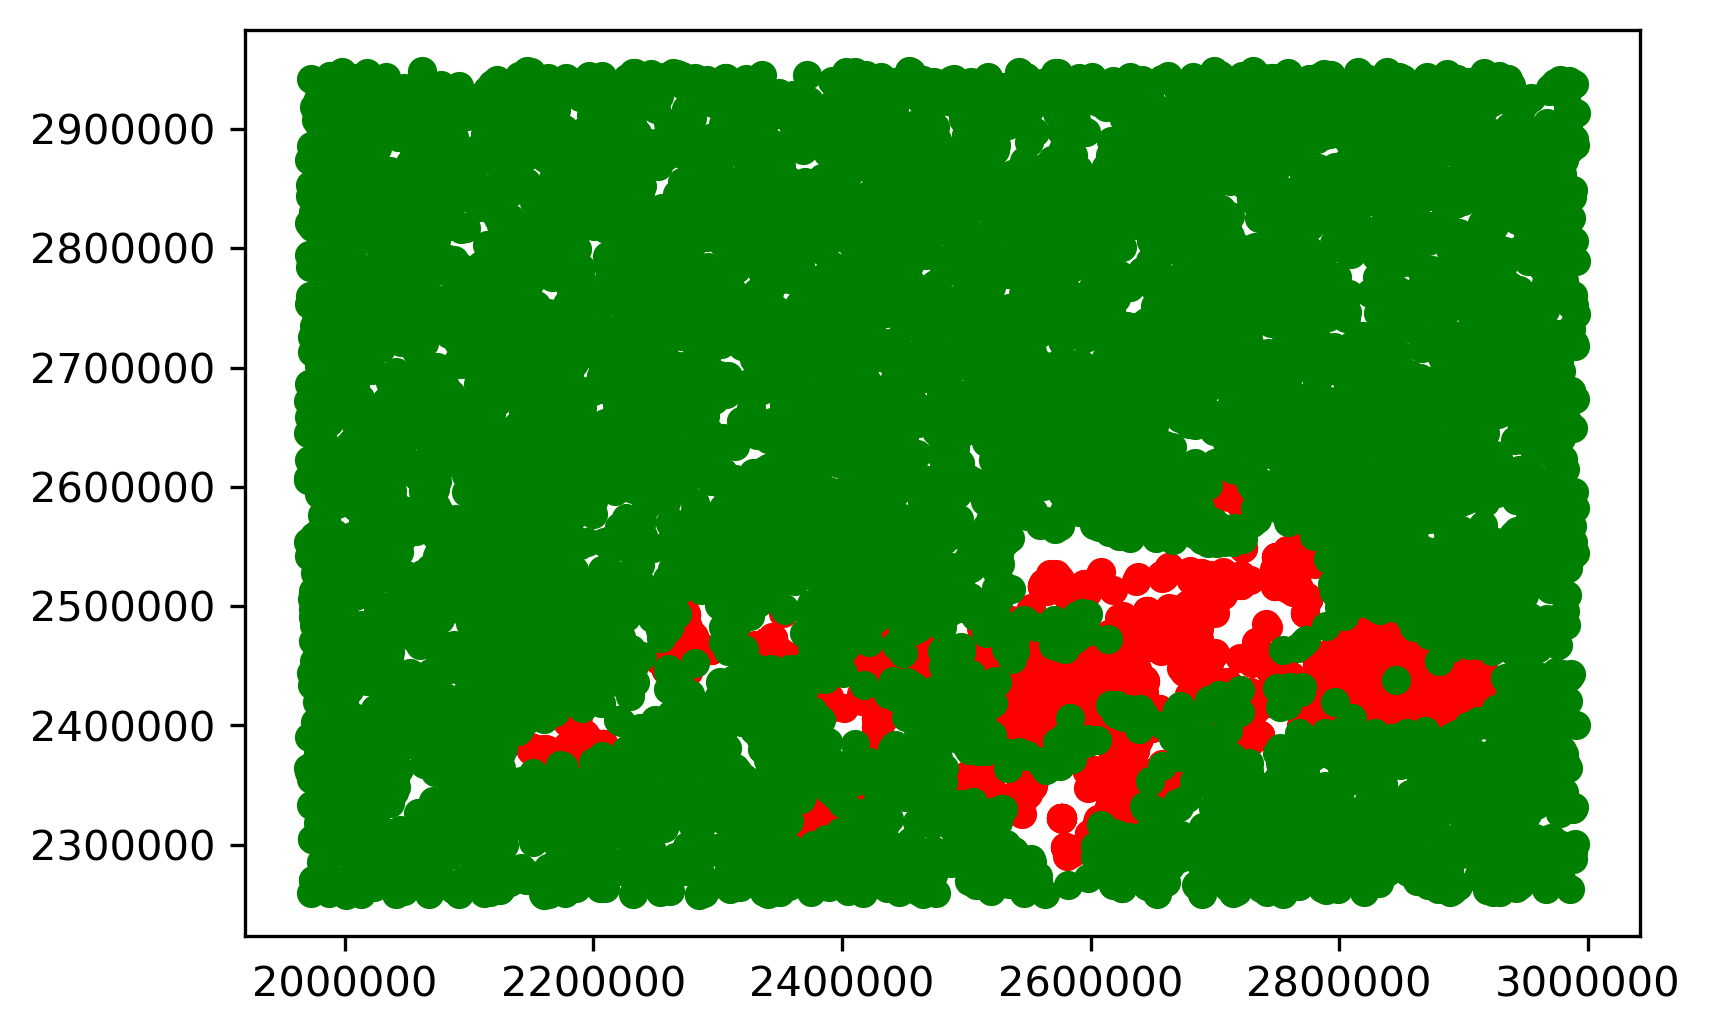

In [572]:
import matplotlib.pyplot as plt
plt.figure()
presence = final_dataset[final_dataset.reliability == 1]
absence = final_dataset[final_dataset.reliability == 0]
plt.plot(absence['longitudedd_num'], absence['latitudedd_num'], 'ro')    
plt.plot(presence['longitudedd_num'], presence['latitudedd_num'], 'go')    

plt.show()

In [573]:
# Do not need
# def make_catagorial(dataframe, columns):
#     for col in columns:
#         dataframe = encode_catagorical(dataframe, col)
#     return dataframe

# merged_dataset = make_catagorial(merged_dataset, ['reliability','sampling_method_desc', 'record_type'])
# merged_dataset

In [574]:
# Do not need
# def encode_one_hot(dataframe, col_name):
#     # let us first remove all NaN values
#     dataframe = dataframe.fillna('0')
    
#     from sklearn.preprocessing import OneHotEncoder
#     enc = OneHotEncoder()
#     X = list(dataframe[str(col_name)].apply(lambda x: [x]))
#     enc.fit(X)
#     display(enc.categories_)
#     dataframe[str(col_name)] = dataframe[str(col_name)].apply(lambda x: enc.transform([[x]]).toarray()[0])
#     return dataframe

# test_df = encode_one_hot(species_presence, 'sampling_method_desc')
# test_df.head()


In [575]:
# Do not think is needed
# display(merged_dataset.head())
# display(merged_dataset.columns.get_loc('record_type'))
# def dummy_adder(dataframe, column):
#     X = pd.get_dummies(merged_dataset[column], prefix_sep='_', drop_first=True)
#     col_loc = dataframe.columns.get_loc(column)
#     for col in X.columns:
#         dataframe.insert(col_loc,col, X[col], True) 
#     dataframe.drop(column, 1)
#     return dataframe

# X = dummy_adder(merged_dataset, 'sampling_method_desc')

In [576]:
# XY = pd.get_dummies(merged_dataset, prefix=['sampling_method_desc', 'record_type'], columns=['sampling_method_desc', 'record_type'])
# XY = encode_catagorical(XY, 'reliability')
# XY.drop(['sv_record_count'], 1, inplace=True) # drop the coordinates so that the difference is not taken into account
# XY

In [577]:
pd.set_option('display.max_columns', 91)


In [578]:
def make_split(dataframe):
    import numpy as np
    labels = np.array(dataframe['reliability'])
    features= dataframe.drop('reliability', axis = 1)
    feature_list = list(features.columns)
    features = np.array(features)

    from sklearn.model_selection import train_test_split
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

#     print('Training Features Shape:', train_features.shape)
#     print('Training Labels Shape:', train_labels.shape)
#     print('Testing Features Shape:', test_features.shape)
#     print('Testing Labels Shape:', test_labels.shape)
    return train_features, test_features, train_labels, test_labels
    
    
def random_forest(train_features, train_labels):
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 5)
    rf.fit(train_features, train_labels);
    
    return rf

def make_predictions(model, test_features, test_labels):
    predictions = model.predict(test_features)

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

    print(confusion_matrix(test_labels,predictions))
    print(classification_report(test_labels,predictions))
    print(accuracy_score(test_labels, predictions))
    return predictions

train_features, test_features, train_labels, test_labels = make_split(final_dataset)
rf = random_forest(train_features, train_labels)
predictions = make_predictions(rf, test_features, test_labels )



[[1620   11]
 [  69 1587]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1631
         1.0       0.99      0.96      0.98      1656

    accuracy                           0.98      3287
   macro avg       0.98      0.98      0.98      3287
weighted avg       0.98      0.98      0.98      3287

0.9756616975965926


In [579]:
def save_model(model, model_name):
    import pickle
    filename = '{}.sav'.format(model_name)
    pickle.dump(model, open(filename, 'wb'))

    return

save_model(rf, "random_forest_model")

In [580]:
def load_model(model_name):
    import pickle
    filename = '{}.sav'.format(model_name)
    model = pickle.load(open(filename, 'rb'))
    return model
rfTest = load_model("random_forest_model")
predictions = make_predictions(rfTest, test_features, test_labels )

[[1620   11]
 [  69 1587]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1631
         1.0       0.99      0.96      0.98      1656

    accuracy                           0.98      3287
   macro avg       0.98      0.98      0.98      3287
weighted avg       0.98      0.98      0.98      3287

0.9756616975965926


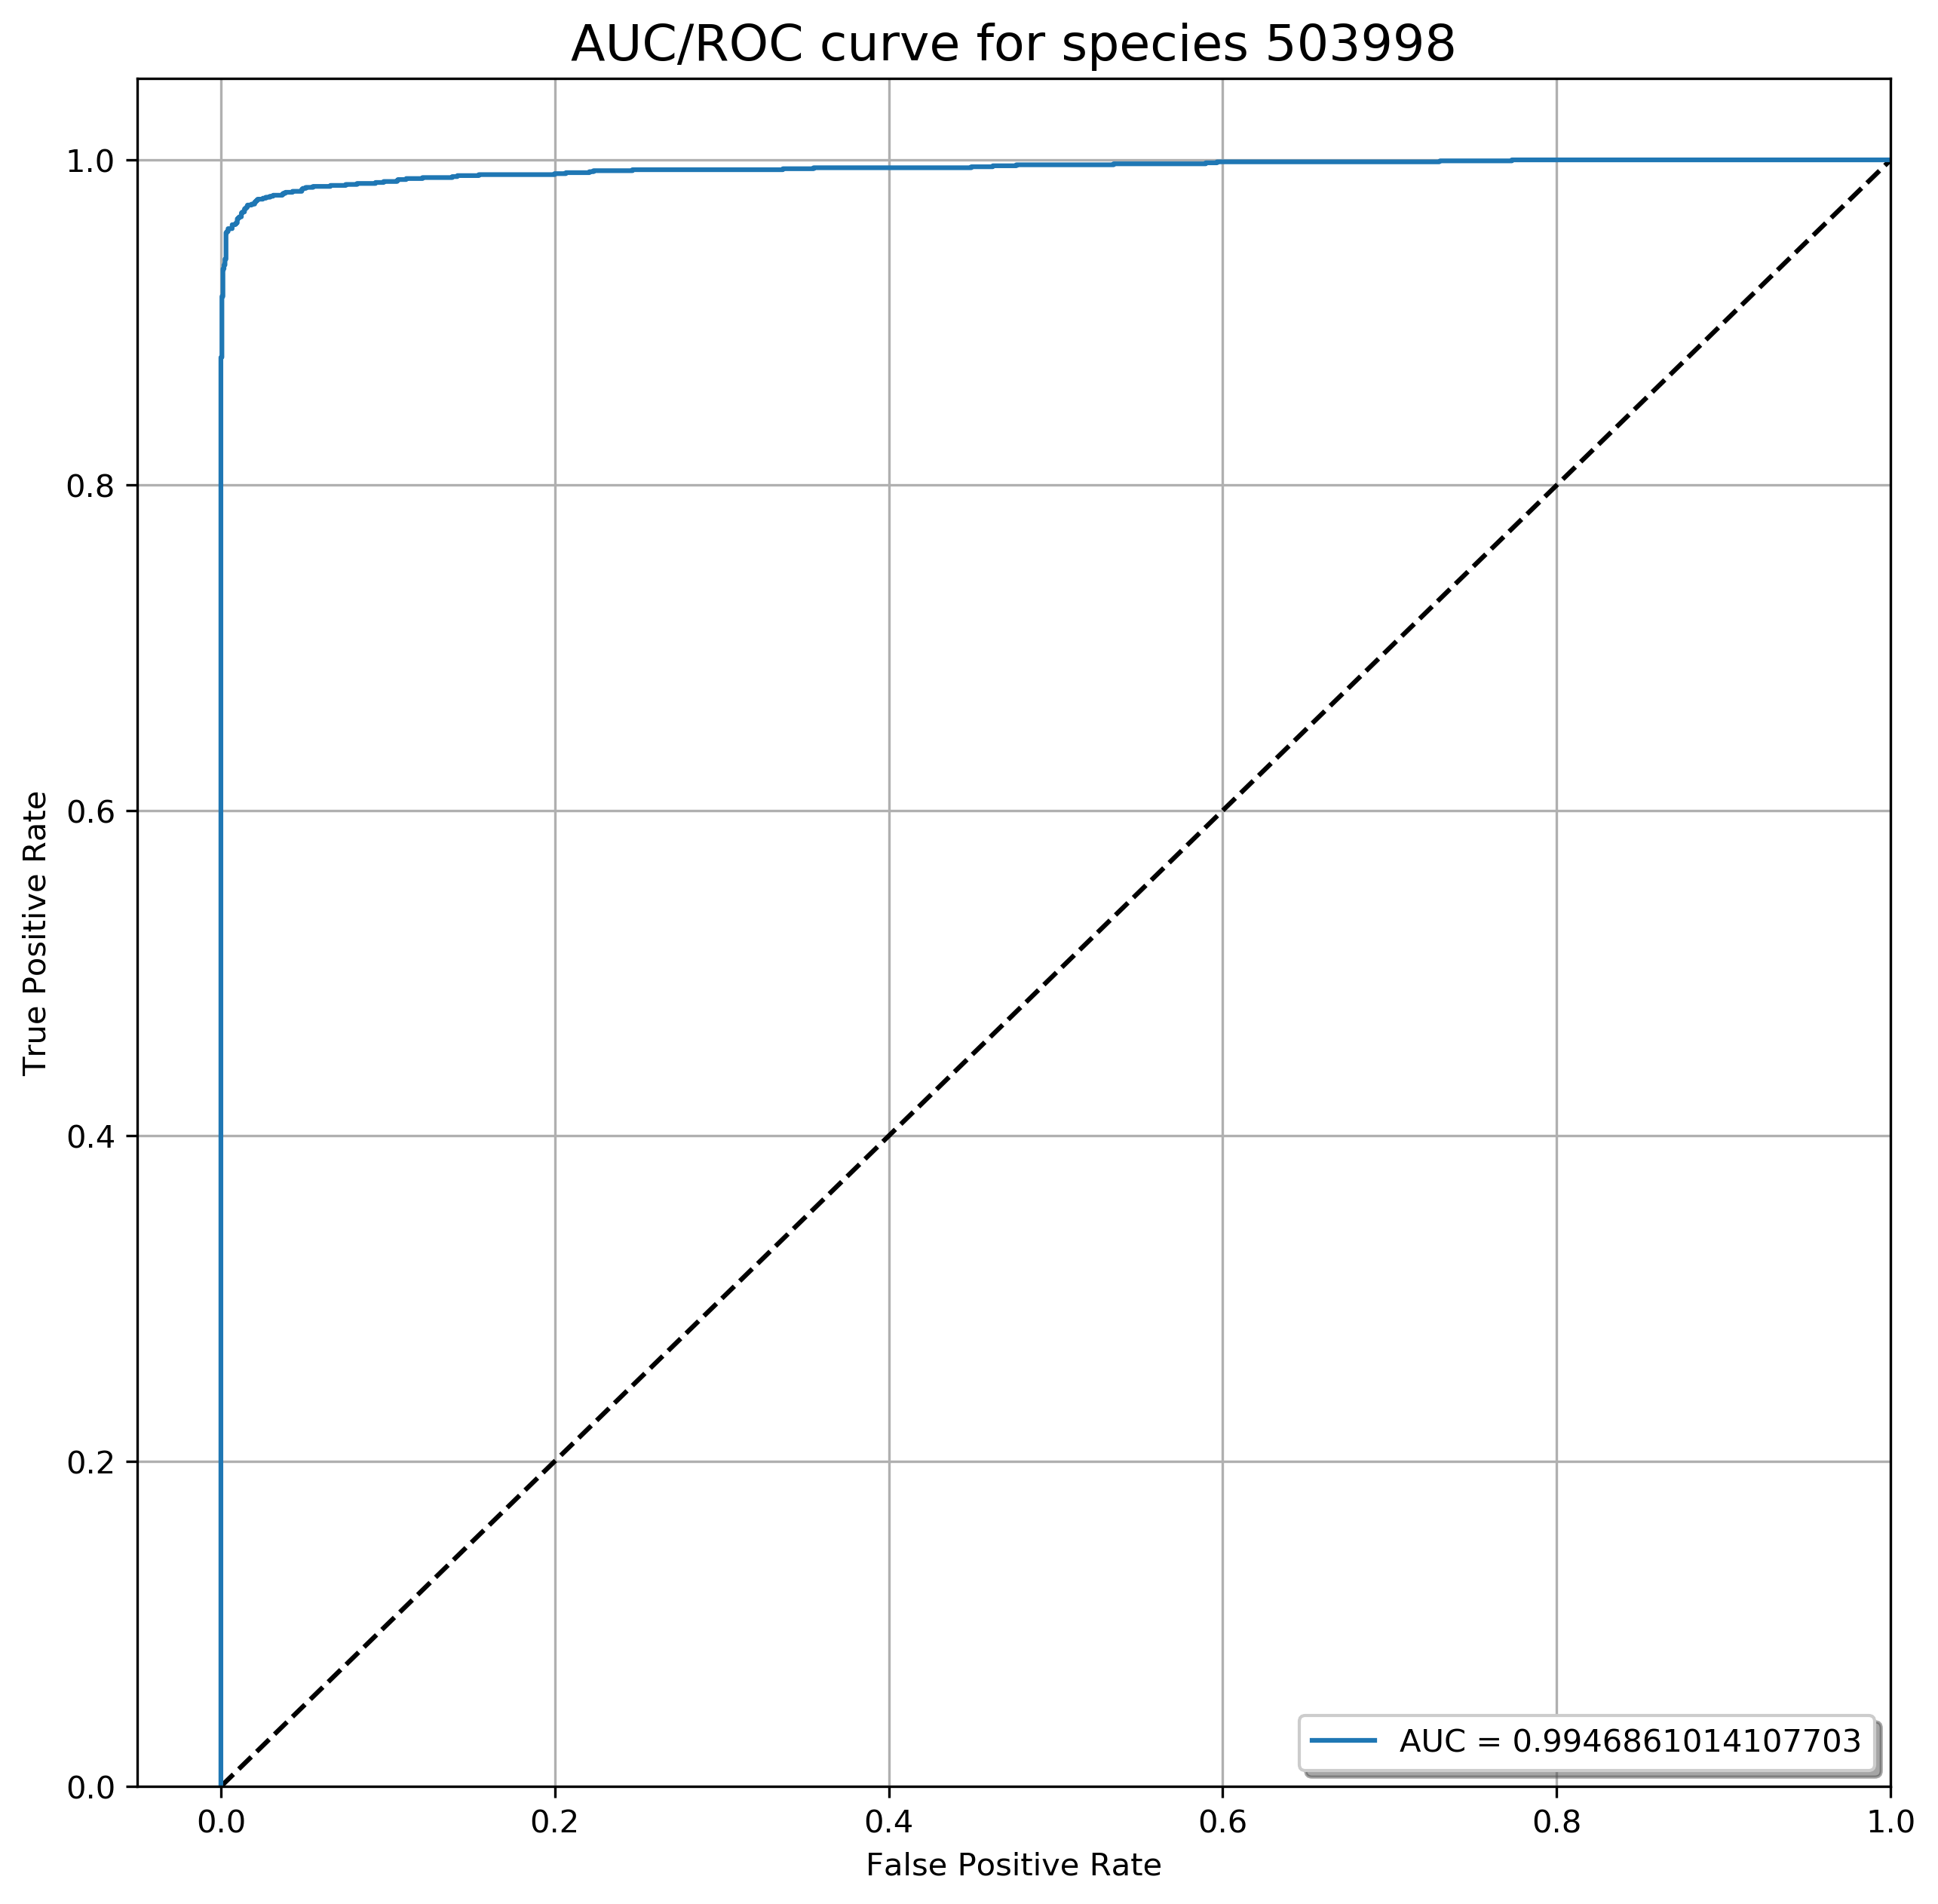

In [581]:
def plot_auc_roc(model,test_features,test_labels, taxon_id):
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    # overall accuracy
    acc = model.score(test_features,test_labels)

    # get roc/auc info
    Y_score = model.predict_proba(test_features)[:,1]
    fpr = dict()
    tpr = dict()
    fpr, tpr, _ = roc_curve(test_labels, Y_score)

    roc_auc = dict()
    roc_auc = auc(fpr, tpr)

    # make the plot
    fig, ax = plt.subplots(figsize = (10,10))
    ax.set_title('AUC/ROC curve for species {}'.format(taxon_id), fontsize=16)

#     plt.figure(figsize=(10,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
    plt.legend(loc="lower right", shadow=True, fancybox =True) 
    plt.show()
    fig.savefig('AUC_ROC_{}.png'.format(taxon_id), bbox_inches='tight')

plot_auc_roc(rf,test_features,test_labels, "503998")

In [500]:
## Will export a graph of a single tree in the random forest ## 
# from sklearn.tree import export_graphviz
# import pydot

# tree = rf.estimators_[2]

# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# (graph, ) = pydot.graph_from_dot_file('tree.dot')

# graph.write_png('tree.png')

In [501]:
def print_feature_importances(model, final_dataset):
    """
    When given a random forest will print the importance of the features that are greater than 0
    """
    importances = list(model.feature_importances_)
    features= final_dataset.drop('reliability', axis = 1)
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(features.columns), importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    feature_importances = filter(lambda x: x[1] > 0.0, feature_importances) 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    return

print_feature_importances(rf, final_dataset)

Variable: VMLITE_PUBLIC_LAND_SU5 Importance: 0.2
Variable: VMLITE_FOREST_SU2    Importance: 0.16
Variable: VMLITE_BUILT_UP_AREA Importance: 0.12
Variable: SummerPre1750Landsat75_300_900m_4 Importance: 0.05
Variable: VMLITE_TR_ROAD       Importance: 0.05
Variable: latitudedd_num       Importance: 0.04
Variable: SummerPre1750Landsat75_300_900m_2 Importance: 0.04
Variable: SummerPre1750Landsat75_300_900m_6 Importance: 0.04
Variable: VMLITE_HY_WATER_AREA Importance: 0.04
Variable: longitudedd_num      Importance: 0.02
Variable: ibra_hex_0           Importance: 0.02
Variable: sept2014JulMinTemp_0 Importance: 0.02
Variable: SummerPre1750Landsat75_300_900m_7 Importance: 0.02
Variable: sept2014JanMaxTemp_0 Importance: 0.02
Variable: 75m_dem_streams_burned_sept2012_0 Importance: 0.01
Variable: vegtype3_4_0         Importance: 0.01
Variable: sept2014JulRainfall_0 Importance: 0.01
Variable: SummerLandsat75_300_900m_0 Importance: 0.01
Variable: SummerLandsat75_300_900m_2 Importance: 0.01
Variable:

In [454]:
## SVC
def svc_model(train_features, train_labels, test_features):
    from sklearn.svm import SVC
    from sklearn.preprocessing import StandardScaler

    clf = SVC(gamma='auto')
    transformer = StandardScaler().fit(train_features)
    transformer.transform(train_features)
    transformer.transform(test_features)

    clf.fit(train_features, train_labels)
    return clf, test_features

svc, svc_test_features = svc_model(train_features, train_labels, test_features)
predictions = make_predictions(svc, test_features, test_labels )


[[38 27]
 [ 0 68]]
              precision    recall  f1-score   support

         0.0       1.00      0.58      0.74        65
         1.0       0.72      1.00      0.83        68

    accuracy                           0.80       133
   macro avg       0.86      0.79      0.79       133
weighted avg       0.85      0.80      0.79       133

0.7969924812030075


In [455]:
## MLP Adam
def mlp_model_adam(train_features, train_labels, test_features):
    from sklearn.neural_network import MLPClassifier    
    from sklearn.preprocessing import StandardScaler

    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
    transformer = StandardScaler().fit(train_features)
    transformer.transform(train_features)
    transformer.transform(test_features)

    mlp.fit(train_features, train_labels)
    return mlp, test_features

mlp, mlp_test_features = mlp_model_adam(train_features, train_labels, test_features)
predictions = make_predictions(mlp, mlp_test_features, test_labels )


[[65  0]
 [ 0 68]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        65
         1.0       1.00      1.00      1.00        68

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133

1.0


In [233]:
## k-nearest neighbours classifier
def kneigh_model(train_features, train_labels):
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(train_features, train_labels)
    return neigh


kneigh = kneigh_model(train_features, train_labels)
predictions = make_predictions(kneigh, test_features, test_labels )


[[12  0]
 [ 1  3]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       1.00      0.75      0.86         4

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.91        16
weighted avg       0.94      0.94      0.93        16

0.9375


In [234]:
## decision tree classifier
def tree_model(train_features, train_labels):
    from sklearn import tree
    clf = tree.DecisionTreeClassifier(random_state=0)
    clf.fit(train_features, train_labels)
    return clf


tree = tree_model(train_features, train_labels)
predictions = make_predictions(tree, test_features, test_labels )


[[11  1]
 [ 1  3]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        12
         1.0       0.75      0.75      0.75         4

    accuracy                           0.88        16
   macro avg       0.83      0.83      0.83        16
weighted avg       0.88      0.88      0.88        16

0.875


In [235]:
## SGD
def sgd_model(train_features, train_labels):
    from sklearn import linear_model
    clf = linear_model.SGDClassifier(max_iter=1000, early_stopping=True)
    clf.fit(train_features, train_labels)
    return clf


sgd = sgd_model(train_features, train_labels)
predictions = make_predictions(sgd, test_features, test_labels )

[[12  0]
 [ 3  1]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        12
         1.0       1.00      0.25      0.40         4

    accuracy                           0.81        16
   macro avg       0.90      0.62      0.64        16
weighted avg       0.85      0.81      0.77        16

0.8125


In [236]:
def ada_model(train_features, train_labels):
    from sklearn.ensemble import AdaBoostClassifier
    clf = AdaBoostClassifier(n_estimators=25, random_state=0)
    clf.fit(train_features, train_labels)
    return clf


ada = ada_model(train_features, train_labels)
predictions = make_predictions(ada, test_features, test_labels )


[[12  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

1.0


In [237]:
def ada_model(train_features, train_labels):
    from sklearn.ensemble import AdaBoostClassifier
    clf = AdaBoostClassifier(n_estimators=25, random_state=0)
    clf.fit(train_features, train_labels)
    return clf


ada = ada_model(train_features, train_labels)
predictions = make_predictions(ada, test_features, test_labels )


[[12  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

1.0


In [238]:
save_model(ada, "ada")
adaTest = load_model("ada")
predictions = make_predictions(adaTest, test_features, test_labels )

[[12  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

1.0


In [243]:
def gbc_model(train_features, train_labels):
    from sklearn.ensemble import GradientBoostingClassifier
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    clf.fit(train_features, train_labels)
    return clf

gbc = gbc_model(train_features, train_labels)
predictions = make_predictions(gbc, test_features, test_labels )


[[11  1]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16

0.9375


In [240]:
save_model(gbc, "gbc")
gbcTest = load_model("gbc")
predictions = make_predictions(gbcTest, test_features, test_labels )

[[11  1]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16

0.9375
